# Description

##### This is a model for prediction that a audiobook customer will buy any audio book again or not.
The data is consist of infomation of 2 years customers of audiobook, with there reviews and purchases. From this data we have to predict that the customer will buy any audiobook again or not.

## importing libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

## reading data

In [2]:
column = ['id','booklength_overall','booklength_avg','price_overall','price_avg','review','review_10/10','minutes_listened',
          'completion','support_request','last_visited_minus_purchase_time','target']

In [3]:
data = pd.read_csv('Audiobooks-data.csv')

In [4]:
data.head()

,873,2160,2160.1,10.13,10.13.1,0,8.91,0.1,0.2,0.3,0.4,1
0,611,1404.0,2808,6.66,13.33,1,6.5,0.0,0.0,0,182,1
1,705,324.0,324,10.13,10.13,1,9.0,0.0,0.0,1,334,1
2,391,1620.0,1620,15.31,15.31,0,9.0,0.0,0.0,0,183,1
3,819,432.0,1296,7.11,21.33,1,9.0,0.0,0.0,0,0,1
4,138,2160.0,2160,10.13,10.13,1,9.0,0.0,0.0,0,5,1


In [5]:
data.columns=column

In [6]:
data

,id,booklength_overall,booklength_avg,price_overall,price_avg,review,review_10/10,minutes_listened,completion,support_request,last_visited_minus_purchase_time,target
0,611,1404.0,2808,6.66,13.33,1,6.50,0.00,0.0,0,182,1
1,705,324.0,324,10.13,10.13,1,9.00,0.00,0.0,1,334,1
2,391,1620.0,1620,15.31,15.31,0,9.00,0.00,0.0,0,183,1
3,819,432.0,1296,7.11,21.33,1,9.00,0.00,0.0,0,0,1
4,138,2160.0,2160,10.13,10.13,1,9.00,0.00,0.0,0,5,1
5,396,1404.0,2808,6.67,13.33,0,7.00,0.00,0.0,0,90,1
6,111,1231.2,6156,7.15,35.73,0,9.00,0.00,0.0,0,2,1
7,348,1188.0,1188,6.92,6.92,0,8.91,0.00,0.0,0,2,1
8,160,1188.0,1188,8.61,8.61,0,8.91,0.00,0.0,0,60,1
9,86,1134.0,2268,10.13,20.27,1,10.00,0.00,0.0,0,282,1


###### droping id column

In [7]:
data.drop('id',axis=1,inplace=True)

###### checking for null value

In [8]:
data.isnull().any().describe()

count        11
unique        1
top       False
freq         11
dtype: object

###### data balancing

In [9]:
data.target.value_counts()

0    11847
1     2236
Name: target, dtype: int64

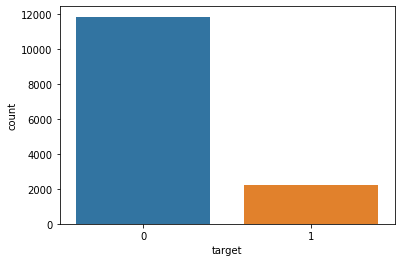

In [10]:
sns.countplot(data['target'])

In [11]:
li = list(data['target'][data['target']==0].sample(n=(11847-2236)).index)

In [12]:
data.drop(li, inplace=True)

In [13]:
data.target.value_counts()

1    2236
0    2236
Name: target, dtype: int64

In [14]:
data.reset_index(inplace=True)

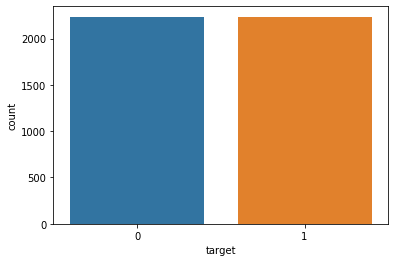

In [15]:
sns.countplot(data['target'])

###### shuffling the data

In [16]:
l = np.arange(data.shape[0])
np.random.shuffle(l)

In [17]:
l

array([2113, 1766, 2478, ..., 1439,  868, 1624])

###### splitting data in X and y (input and output)

In [18]:
X = data.drop('target', axis=1)
y = data['target']

###### standardizing the data

In [19]:
from sklearn.preprocessing import scale
X = scale(X)

###### onehot encoding

In [20]:
y = tf.keras.utils.to_categorical(y)

In [21]:
X

array([[-1.07782294, -0.29439605,  1.11961073, ..., -0.43980923,
        -0.19358039,  1.20461639],
       [-1.0775896 , -2.45729509, -1.71255476, ..., -0.43980923,
         2.03758323,  2.83887866],
       [-1.07735625,  0.13818376, -0.2349032 , ..., -0.43980923,
        -0.19358039,  1.21536812],
       ...,
       [ 2.20534896,  1.21963328,  0.38078495, ..., -0.43980923,
        -0.19358039, -0.75219764],
       [ 2.20721572,  1.21963328,  0.38078495, ..., -0.43980923,
        -0.19358039, -0.17160446],
       [ 2.20768241, -0.94326576, -0.85059135, ..., -0.43980923,
        -0.19358039, -0.4403976 ]])

###### train test split

In [22]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=.2,random_state=1)

###### using keras from tensorflow

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'] )

###### using early stopping to prevent overfitting

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping()

###### training and testing the model

In [26]:
model.fit(train_X,train_y,epochs=100,batch_size=1,validation_data=(test_X,test_y),callbacks=[early_stopping])

Train on 3577 samples, validate on 895 samples
Epoch 1/100
3577/3577 [==============================] - 6s 2ms/sample - loss: 0.0736 - accuracy: 0.9768 - val_loss: 0.0537 - val_accuracy: 0.9899
Epoch 2/100
3577/3577 [==============================] - 6s 2ms/sample - loss: 0.0370 - accuracy: 0.9891 - val_loss: 0.0221 - val_accuracy: 0.9911
Epoch 3/100
3577/3577 [==============================] - 5s 1ms/sample - loss: 0.0234 - accuracy: 0.9911 - val_loss: 0.0168 - val_accuracy: 0.9955
Epoch 4/100
3577/3577 [==============================] - 5s 2ms/sample - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0207 - val_accuracy: 0.9911
